## Importando as bibliotecas

In [1]:
import tensorflow as tf
from tensorflow import keras
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings('ignore')

## Conhecendo o conjunto de dados

In [2]:
# Carregando o dataset Fashion MNIST do Keras.
dataset = keras.datasets.fashion_mnist

# Carregando as imagens de treino e teste e as identificações das imagens.
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

## Verificando o conjunto de dados

In [3]:
print(f'Quantidade de imagens de treino: {imagens_treino.shape[0]}, quantidade de pixels por imagem: {imagens_treino.shape[1]}x{imagens_treino.shape[2]}')
print(f'Quantidade de imagens de teste: {imagens_teste.shape[0]}, quantidade de pixels por imagem: {imagens_teste.shape[1]}x{imagens_teste.shape[2]}')

Quantidade de imagens de treino: 60000, quantidade de pixels por imagem: 28x28
Quantidade de imagens de teste: 10000, quantidade de pixels por imagem: 28x28


In [4]:
# Verificando os valores mínimo e máximo de identificações.
print('Valor mínimo: ', identificacoes_treino.min())
print('Valor máximo: ', identificacoes_treino.max())

# Criando uma lista de classificação.
nomes_classificacao = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

Valor mínimo:  0
Valor máximo:  9


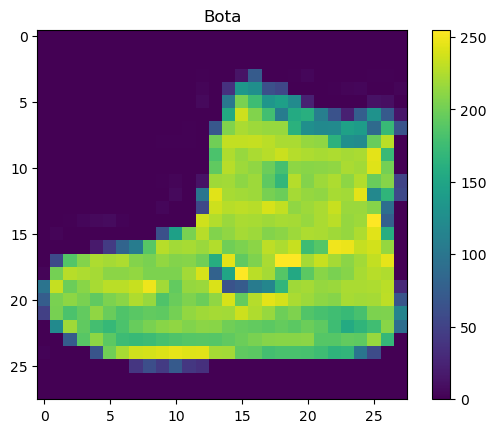

In [5]:
# Mostra a imagem na posição 0 do array de imagens de treino.
plt.imshow(imagens_treino[0])
plt.title(nomes_classificacao[identificacoes_treino[0]])
plt.colorbar()

## Treinando o modelo

In [6]:
# Normalizando as imagens.
imagens_treino = imagens_treino/float(255)

In [7]:
# Criando o modelo.
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Entrada - camada 0: está “achatando” as nossas imagens de 28 x 28 pixels em um array de 784 pixels.
    keras.layers.Dense(256, activation=tf.nn.relu), # Processamento - Camada 1: 256 neurônios, função de ativação relu (Função não linear do Neural networks).
    keras.layers.Dense(128, activation=tf.nn.relu), # Processamento - Camada 2: 128 neurônios, função de ativação relu (Função não linear do Neural networks).
    keras.layers.Dense(10, activation=tf.nn.softmax) # Saída - Camada 3: 10 neurônios (categorias), função de ativação softmax (Probabilidade de cada categoria).
])

# Compilando o modelo.
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Treinando o modelo.
historico = modelo.fit(imagens_treino, 
                       identificacoes_treino, 
                       epochs=5, # Treinando 5 vezes.
                       validation_split=0.2) # 20% dos dados de treino para validação.



Epoch 1/5


1500/1500 [==============================] - 27s 6ms/step - loss: 0.4940 - accuracy: 0.8247 - val_loss: 0.4044 - val_accuracy: 0.8526
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3704 - accuracy: 0.8648 - val_loss: 0.3817 - val_accuracy: 0.8619
Epoch 3/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3325 - accuracy: 0.8768 - val_loss: 0.3683 - val_accuracy: 0.8696
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3066 - accuracy: 0.8855 - val_loss: 0.3549 - val_accuracy: 0.8693
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2888 - accuracy: 0.8914 - val_loss: 0.3336 - val_accuracy: 0.8832


### Visualizando as acurácias e perdas de treino e validação por época

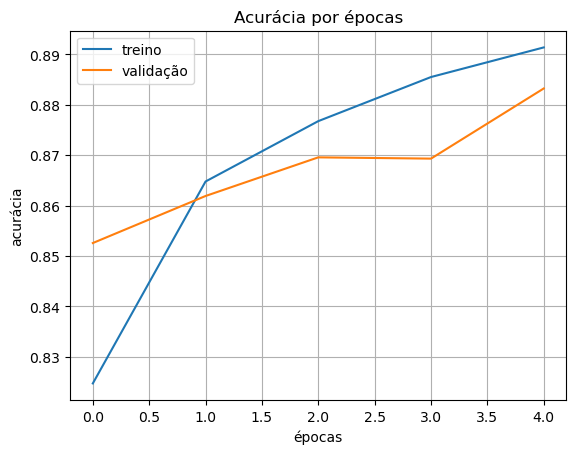

In [8]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])
plt.grid(True)
plt.show()

No gráfico acima podemos notar que a cada época, os dados de treino vão se adaptando melhor no no nosso modelo, enquanto os dados de validação ainda não atinge as mesmas métricas, o que podemos concluir que houve um overfitting.

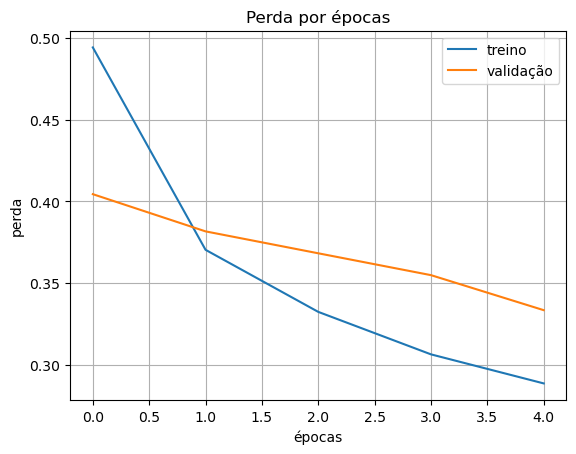

In [9]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])
plt.grid(True)
plt.show()

Assim como no gráfico anterior, os dados de treino vão se adaptando ao modelo a cada época, tendo menos perdas, enquanto os dados de validação não consegue atingir as mesmas métricas, gerando overfitting.

### Testando o modelo

In [10]:
# Testando o modelo.
testes = modelo.predict(imagens_teste)

# Verificando o resultado do teste com as identificações de teste.
print(f'Restultado do teste: {np.argmax(testes[1])}')
print(f'Número da imagem de teste: {identificacoes_teste[1]}')

313/313 [==============================] - 1s 3ms/step
Restultado do teste: 2
Número da imagem de teste: 2


Ao testar o modelo, podemos notar que o modelo está prevendo os dados corretamente.

### Avaliando o modelo

In [11]:
# Avaliando o modelo: calculando a perda e acurácia.
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda do teste: {perda_teste}\nAcurácia do teste: {acuracia_teste}')

313/313 [==============================] - 2s 3ms/step - loss: 59.2777 - accuracy: 0.8553
Perda do teste: 59.27773666381836
Acurácia do teste: 0.8553000092506409


Ao avaliar o modelo, podemos notar que a perda e a acurácia dos dados de teste são maiores, sendo assim, pode-se concluir que podemos reajustar

## Reajustando o modelo

In [12]:
# Criando o modelo.
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # Entrada - camada 0: está “achatando” as nossas imagens de 28 por 28 pixels em um array de 784 pixels.
    keras.layers.Dense(256, activation=tf.nn.relu), # Processamento - Camada 1: 256 neurônios, função de ativação relu (Função não linear))(Neural networks).
    keras.layers.Dropout(0.3), # Normalização - Dropout de 30% dos neurônios.
    keras.layers.Dense(10, activation=tf.nn.softmax) # Saída - Camada 2: 10 neurônios (categorias), função de ativação softmax (Probabilidade de cada categoria).
])

# Compilando o modelo.
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Treinando o modelo.
historico = modelo.fit(imagens_treino, identificacoes_treino, 
           epochs=5, # Treinando 5 vezes.
           validation_split=0.2) # 20% dos dados de treino para validação.

Epoch 1/5
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5477 - accuracy: 0.8060 - val_loss: 0.4309 - val_accuracy: 0.8437
Epoch 2/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4159 - accuracy: 0.8480 - val_loss: 0.3719 - val_accuracy: 0.8675
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3760 - accuracy: 0.8629 - val_loss: 0.3576 - val_accuracy: 0.8697
Epoch 4/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3586 - accuracy: 0.8676 - val_loss: 0.3382 - val_accuracy: 0.8767
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3420 - accuracy: 0.8735 - val_loss: 0.3626 - val_accuracy: 0.8742


### Visualizando as acurácias e perdas de treino e validação por época após reajustes

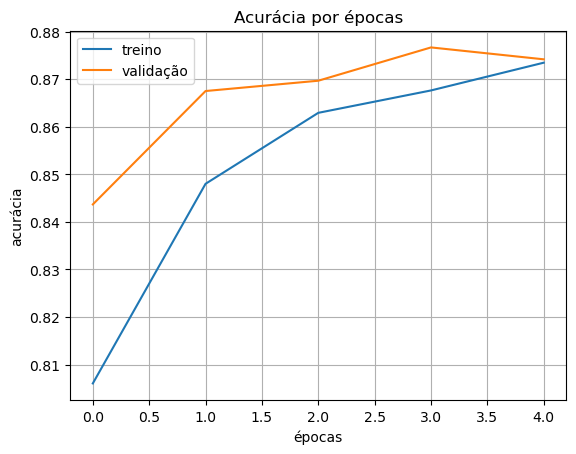

In [13]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])
plt.grid(True)
plt.show()

Ao reajustar o modelo, podemos notar que houve melhoria na acurácia dos dados de validação, superando a acurácia dos dados de treino.

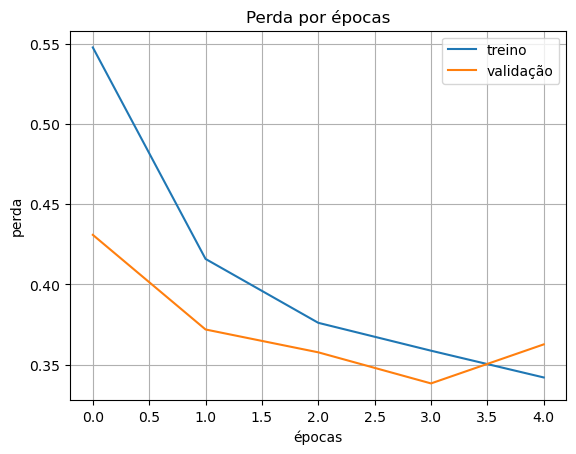

In [14]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])
plt.grid(True)
plt.show()

Assim como no gráfico anterior, podemos notar a perda dos dados de validação diminuiu em relação ao modelo anterior.

### Avaliando o modelo após reajuste

In [15]:
# Avaliando o modelo: calculando a perda e acurácia.
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda do teste: {perda_teste}\nAcurácia do teste: {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 70.5991 - accuracy: 0.8500
Perda do teste: 70.59907531738281
Acurácia do teste: 0.8500000238418579


## Salvando o modelo

In [16]:
modelo.save('modelo.h5')